In [40]:
import pandas as pd


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("/content/spam.csv",encoding="latin-1")

In [43]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [44]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [45]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [46]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [47]:
label_df=df['v1'].value_counts().index

In [48]:
values_df=df['v1'].value_counts().values

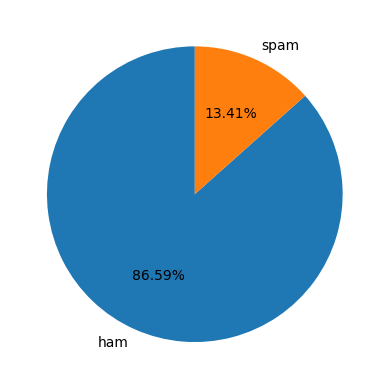

In [49]:
plt.pie(values_df, labels=label_df,autopct='%1.2f%%', startangle=90)
plt.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer


In [51]:
vectorizer = CountVectorizer()

In [52]:
X = vectorizer.fit_transform(df['v1'])

In [53]:
X


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5572 stored elements and shape (5572, 2)>

In [54]:
X.shape

(5572, 2)

In [55]:
vectorizer.get_feature_names_out()

array(['ham', 'spam'], dtype=object)

In [56]:
print(X.toarray())

[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [57]:
from sklearn.datasets import make_classification

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.ensemble import RandomForestClassifier


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, df['v2'], test_size=0.33, random_state=42)

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
clf = RandomForestClassifier()

In [63]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
y_test=clf.predict(X_test)

In [65]:
y_pred = clf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                                                                                                                                                                 precision    recall  f1-score   support

FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+       1.00      1.00      1.00       252
                                                                                                                                        Sorry, I'll call later       1.00      1.00      1.00      1587

                                                                                                                                                      accuracy                           1.00      1839
                                                                                                                                                     macro avg  

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Sample dataset
data = load_iris()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# For binary classification
y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


ValueError: multiclass format is not supported

In [69]:
accuracy_score(y_test, y_pred)

1.0

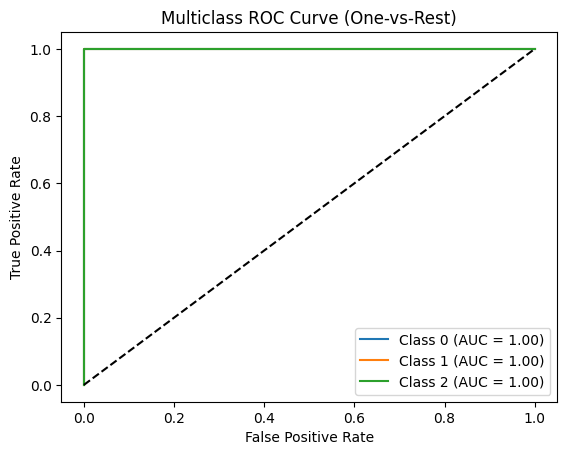

In [70]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Example dataset
data = load_iris()
X, y = data.data, data.target
n_classes = len(np.unique(y))

# Binarize the output for OvR
y_bin = label_binarize(y, classes=[0, 1, 2])

X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train model with OvR wrapper
classifier = OneVsRestClassifier(RandomForestClassifier())
classifier.fit(X_train, y_train_bin)
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()
